---
---

<h1><center><ins>Exercise Sheet 5</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, cos

## Exercise 1 - Numerical derivative

**(A)** Compute the derivative of the following two functions:

$$ f_1(x) = x^2 + \cos(x) $$

$$ f_2(x) = \exp(x) - x^3 $$

in correspondence of at least $N = 50$ values $x_i$ ($i = 1, ..., N$) of the variable $x$ in the interval $[1,5]$. To do this, *write your own code to compute the derivatives numerically*.

**(B)** Compare the resulting values you get for the numerical derivatives with the corresponding analytic solutions. Calculate the value of the quantity $q$ for each function:

$$ q = \sum_{i=1}^N \frac{\left[d_i - f'(x_i) \right]}{f'(x_i)} $$

where $d_i$ are the values you obtained for the numerical derivatives for each of the $N$ abscissas, and $f'(x_i)$ are the analytical derivatives evaluated in points $x_i$. How does the value of $q$ change when changing the value of $h$ to compute the derivatives numerically? How do the values of $q$ compare for the two functions? Discuss your findings.

<function matplotlib.pyplot.show(close=None, block=None)>

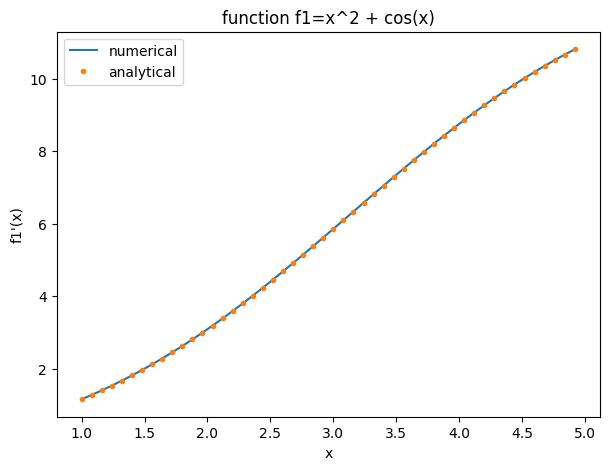

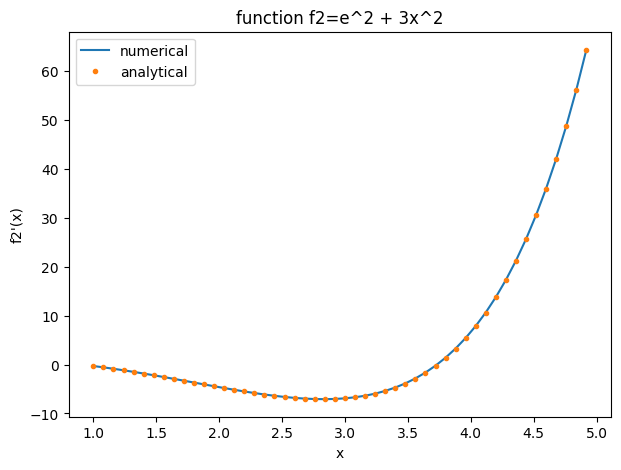

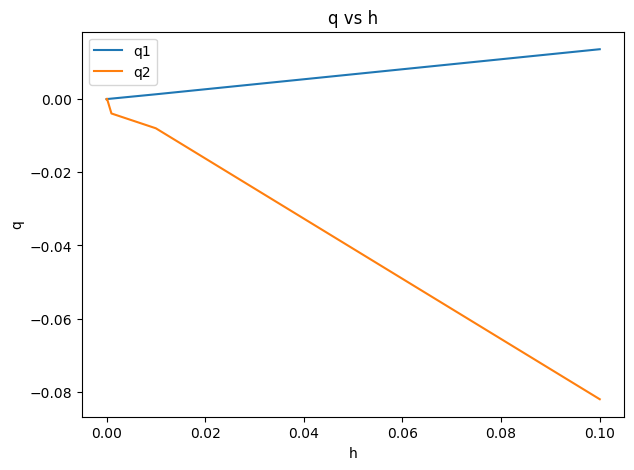

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, cos

# Exercise 1a
# compute the derivative 
# Define functions and derivates

def f1(x):
    return x**2 + np.cos(x)

def f1strich(x):
    return 2*x - np.sin(x)

def f2(x):
    return np.exp(x) - x**3

def f2strich(x):
    return np.exp(x) - 3*x**2

# Numerical Derivation

def derivate(f,fd,a,b,N):
    h=(b-a)/N
    x=a
    fprime=[]
    xstuetz=[]
    q=0
    for i in range(N):
        fprime+=[(f(x+h)-f(x-h))/(2*h)]

        q+=np.abs(fprime[i]-fd(x))/fd(x)
        
        xstuetz+=[x]
        x=x+h
    return fprime,xstuetz,q

#Main program

a=1
b=5
N=50

#Calculate stepwidth h
h=(b-a)/N

f1prime,xachse,qf1=derivate(f1,f1strich,a,b,N)
f2prime,f2_xachse,qf2=derivate(f2,f2strich,a,b,N)


x=a
ywerte=[]
ywerte2=[]
for i in range(N):
    ywerte+=[f1strich(x)]
    ywerte2+=[f2strich(x)]
    x=x+h

#plot the results
plt.figure(figsize=(7,5))
plt.plot(xachse,f1prime, label="numerical")
plt.plot(xachse,ywerte, 'o',markersize=3, label="analytical")
plt.xlabel("x")
plt.ylabel("f1'(x)")
plt.title("function f1=x^2 + cos(x)")
plt.legend()
plt.show


#plot the results
plt.figure(figsize=(7,5))
plt.plot(xachse,f2prime, label="numerical")
plt.plot(xachse,ywerte2, 'o',markersize=3, label="analytical")
plt.xlabel("x")
plt.ylabel("f2'(x)")
plt.title("function f2=e^2 + 3x^2")
plt.legend()
plt.show


# Exercise 1b
# Compare q for different values of h

#define different values for h
h_list = [0.8, 0.08, 0.008, 0.0008]

#calculate q for different values of h
h_p=[]
q1_p=[]
q2_p=[]
for h in h_list:
    N=int((b-a)/h)
    f1prime,xachse,qf1=derivate(f1,f1strich,a,b,N)
    f2prime,f2_xachse,qf2=derivate(f2,f2strich,a,b,N)
    h_p+=[h]
    q1_p+=[qf1]
    q2_p+=[qf2]

#plot q vs h
   
plt.figure(figsize=(7,5))
plt.plot(h_p, q1_p, label="q1")
plt.plot(h_p, q2_p, label="q2")
plt.xlabel("h")
plt.ylabel("q")
plt.title("q vs h")
plt.legend()
plt.show
    

## Exercise 1B Interpretation of result

The parameter q is a measure of the accumulated relative error. If q > 0, the values from numerical derivation are bigger than the exact solution; if q < 0 it is otherwise. q is not normalized according to N, thus its value depends on N, that means, the size of the step width. In the example, the numerical derivation overestimates the correct solution for f1 and underestimates the correct solution for f2. In both cases, smaller h leads to a smaller error. 

The error of the numerical derivation depends on the third derivation of the function (see Lecture Notes) and is of the order $\frac{h^3}{6} f'''(x)$. In case of f1, the third derivation is sin(x), for f2, the third derivation is $e^x - 6$. The sign of $f'''(x)$ determines if the numerical derivation is larger or smaller than the exact solution. In both cases, f''' changes the sign in [1,5] but the positiv values are more common. But in case of f2, the function grows much faster with x than f1, which can cause larger roundoff/truncation errors. 

## Exercise 2 - Newton-Cotes formulas

In the file ```surface_luminosity.txt``` you will find the numerical function describing the surface luminosity $\Sigma$ of a globular star cluster as a function of the distance $R$ from its centre (projected on the plane of the sky). Compute the total luminosity $L$ of the system by performing the integral

$$ L = \int_0^{R_{\text{max}}} \Sigma(R) \, 2 \pi R \, dR $$

using the trapezoid rule and Simpson's rule, and compare the results you obtain. To do this, first choose one of these methods and implement **your own algorithm to compute the integral with it**; for the other method, use the corresponding built-in python function ```scipy.integrate.trapz``` or ```scipy.integrate.simps``` and familiarize on its usage.

In [2]:
import numpy as np
from scipy import integrate


##Trapezoid rule
# y: values of the function to integrate
# x: sampling points
def trapezoid(y, x):
    integral=0
    for i in range(len(x)-1):
        h=x[i+1]-x[i]
        integral += (h*(y[i]+y[i+1])/2)
    return integral

#Main program

#read in data
data = np.loadtxt("surface_luminosity.txt")
R = np.asarray(data[:,0], dtype=float)
Sigma = np.asarray(data[:, 1], dtype=float)

#Calculate integrand
integ=Sigma*2*np.pi*R

#Call trapezoid rule
L_trapezoid = trapezoid(integ,R)

#Call simpson rule from scipy
L_simpson = integrate.simpson(integ,x=R)

#Print results
print (f"Total luminosity (with trapezoid rule): {L_trapezoid:.2f}")
print (f"Total luminosity (with Simpson's rule): {L_simpson:.2f}")
#print (R)
#print (Sigma)

Total luminosity (with trapezoid rule): 1285408.71
Total luminosity (with Simpson's rule): 1282549.63


## Exercise 3 - Gaussian Quadrature

**(A)** Compute the following integral by using a 4-point Gaussian quadrature. 

$$ I = \int_{-1}^{1} \cos(x) dx $$

To do this, use the Legendre polynomial of degree 4:

$$ P_4(x) = \frac{1}{8}(35 x^4 - 30 x^2 +3) $$

At this link: https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature you can find the roots of Legendre polynomials and the necessary weights to solve the integral (i.e., you do not have to calculate them all from scratch!).

**(B)** Compare the result with the ones you obtain when using a Legendre polynomial of degree 3, 2, and 1, and comment your findings.

In [3]:
# Define function to integrate
def f(x):
    return np.cos(x)

#roots x and weigths w from https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature
#

def gauss_legendre1(f): 
#Polynomial of degree 0
# weight=2, x=0    
    integral = 2*f(0)
        
    return integral

def gauss_legendre2(f):
#Polynomial of degree 2
    
    x = np.array([-0.5773502691896257,                    
                   0.5773502691896257], dtype=float)
    w = np.array([0.88888888888888889,
                  0.88888888888888889], dtype=float)

# start integration loop
    integral=0
    n=2
    for i in range(n):
#        integral = integral+w[i]*f(x[i])
        integral += w[i]*f(x[i])
        
    return integral

def gauss_legendre3(f):
#Polynomial of degree 3

    x = np.array([-0.7745966692414834,                    
                   0,
                   0.7745966692414834],dtype=float)
    w = np.array([0.5555555555555559,
                  0.5555555555555559,
                  0.5555555555555559], dtype=float)
# start integration loop
    integral=0
    n=3
    for i in range(n):
        integral += w[i]*f(x[i])
        
    return integral

def gauss_legendre4(f):
    
    x = np.array([-0.8611363115940526,                    
                  -0.3399810435848563,
                   0.3399810435848563,
                   0.8611363115940526], dtype=float)
    w = np.array([0.3478548451374538,
                  0.6521451548625461,
                  0.6521451548625461,
                  0.3478548451374538], dtype=float)
# start integration loop
    integral=0
    n=4
    for i in range(n):
        integral += w[i]*f(x[i])
        
    return integral

###    
#Main Program

# Exact value of integral
I_exact = 2.0 * np.sin(1.0)

# initialize array for results
I = [0, 0, 0, 0,0] 

#calculate GL-quadrature for different degrees
I[1] = gauss_legendre1(f)
I[2] = gauss_legendre2(f)
I[3] = gauss_legendre3(f)
I[4] = gauss_legendre4(f)

#calculate error for different degrees, put the values in array results
results = []
for n in [1, 2, 3, 4]:
    err = abs(I[n] - I_exact)
    results.append((n, I[n], err))


# Output
print("Gauß-Legendre quadratur for ∫_{-1}^{1} cos(x) dx")
print(f"Exaxt: I = 2 sin(1) = {I_exact:.12f}\n")
print(f"{'n':>2s} | {'I_n':>18s} | {'|I_n - I_exact|':>18s}")
print("-"*46)
for n, I_n, err in results:
    print(f"{n:2d} | {I_n:18.12f} | {err:18.12e}")

print("\n\nThe higher the degree of the polynomial, the better the result")



Gauß-Legendre quadratur for ∫_{-1}^{1} cos(x) dx
Exaxt: I = 2 sin(1) = 1.682941969616

 n |                I_n |    |I_n - I_exact|
----------------------------------------------
 1 |     2.000000000000 | 3.170580303842e-01
 2 |     1.489621027013 | 1.933209426025e-01
 3 |     1.349670214394 | 3.332717552222e-01
 4 |     1.682941688696 | 2.809198198506e-07


The higher the degree of the polynomial, the better the result


## Exercise 4 - Monte Carlo integration 

Consider the following integral:
$$ I = \int_0^1 \cos \left(\frac{\pi x}{2} \right) dx = \frac{2}{\pi} $$

**(A)** Compute the above integral and its variance by using the following Monte Carlo methods:

1. mean value

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.



## Exercise 5 - Monte Carlo integration continued (optional)

**(A)** Compute the above integral from Exercise 4 and its variance by using the other Monte Carlo methods covered in the lecture:

2. importance sampling
3. control variates
4. antithetic variates

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.